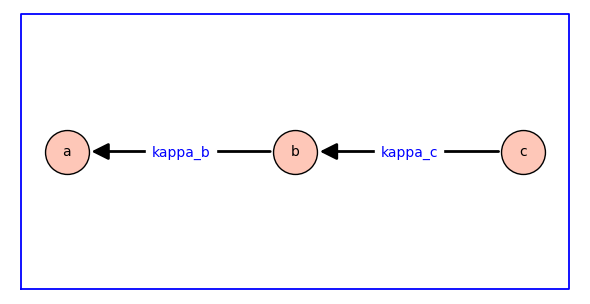

In [1]:
var('a b c kappa_b kappa_c')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kappa_b)
T.set_edge_label(c,b,kappa_c)
T.plot(figsize=6,pos={a:(0,0),b:(2,0),c:(4,0)},edge_labels=True,graph_border=True,vertex_size=1000)

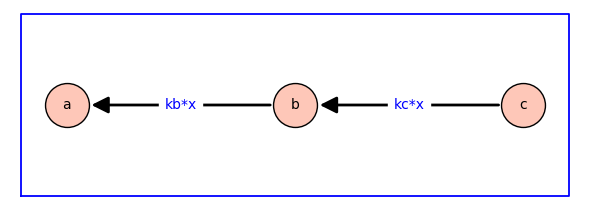

In [2]:
var('a b c x kb kc')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kb*x)
T.set_edge_label(c,b,kc*x)
T.plot(figsize=6,pos={a:(0,0),b:(3,0),c:(6,0)},edge_labels=True,graph_border=True,vertex_size=1000)

In [3]:
paths = T.all_simple_paths(starting_vertices=[a,b,c],ending_vertices=[a],trivial=True)
print(paths)

[[a], [b, a], [c, b, a]]


In [4]:
z = []
for p in paths:
    w = 1
    for i in range(len(p)-1):
       w = w*T.edge_label(p[i],p[i+1])
    z.append(w)
print(z)

[1, kb*x, kb*kc*x^2]


In [5]:
ztot = sum(z);
prob = []
for i in range(len(z)):
    prob.append(z[i]/ztot)
print(prob)

[1/(kb*kc*x^2 + kb*x + 1), kb*x/(kb*kc*x^2 + kb*x + 1), kb*kc*x^2/(kb*kc*x^2 + kb*x + 1)]


p[0] = 1/(x^2 + x + 1)
p[1] = x/(x^2 + x + 1)
p[2] = x^2/(x^2 + x + 1)


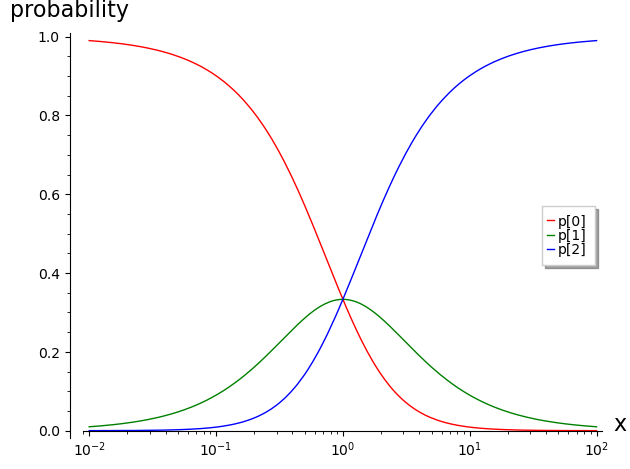

In [6]:
xmin=0.01; xmax=100;
params = {kb:1,kc:1}
p = [0]*3
col = ['red','green','blue']
for i in range(3):
    p[i] = plot_semilogx(prob[i].subs(params), (x, xmin, xmax), color=col[i], legend_label='p[%s]'%i, axes_labels=['x', 'probability'])
    print('p[%s] ='%i,prob[i].subs(params))
show(sum(p))